In [6]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np
import cv2
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
DATA_DIR = "C:/Users/mavis/thesis/real_time_product_detection/images/"
CATEGORIES = ['BEANS','CAKE','CANDY','CEREAL','CHIPS','CHOCOLATE','COFFEE','CORN','FISH','FLOUR','HONEY',
                    'JAM','JUICE','MILK','NUTS','OIL','PASTA','RICE','SODA','SPICES','SUGAR','TEA','TOMATO_SAUCE',
                    'VINEGAR','WATER']

# for category in CATEGORIES:
#     path = os.path.join(DATA_DIR,category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_array,cmap="gray")
#         plt.show()
#         break
#     break

# print(img_array.shape)

IMG_SIZE = 250

# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array, cmap='gray')
# plt.show()

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:

                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])

            except Exception as e:  # in the interest in keeping the output clean...
                print("OSErrroBad img most likely", e, os.path.join(path,img))

create_training_data()
print(len(training_data))

import random
random.shuffle(training_data)
# for sample in training_data:
#     print([sample[1]])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# X = np.array(X).reshape(-1, 256,256,1)

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()





100%|████████████████████████████████████████████████████████████████████████████████| 262/262 [00:04<00:00, 60.03it/s]


4947
[[[[128]
   [128]
   [128]
   ...
   [128]
   [128]
   [128]]

  [[128]
   [128]
   [128]
   ...
   [128]
   [128]
   [128]]

  [[128]
   [128]
   [128]
   ...
   [128]
   [128]
   [128]]

  ...

  [[128]
   [128]
   [128]
   ...
   [128]
   [128]
   [128]]

  [[128]
   [128]
   [128]
   ...
   [128]
   [128]
   [128]]

  [[128]
   [128]
   [128]
   ...
   [128]
   [128]
   [128]]]]


In [38]:
from sklearn.preprocessing import LabelEncoder
y = np.array(y)
# le = LabelEncoder()
from keras.utils import to_categorical
y = to_categorical(y)
# y = le.fit_transform(y)

In [39]:
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.15, random_state=42)

In [40]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import SGD, Adam, Adagrad
from keras.callbacks import ModelCheckpoint, TerminateOnNaN, TensorBoard,ReduceLROnPlateau



class VGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # CONV => RELU => POOL layer set
        model.add(Conv2D(32, (3, 3), padding="same",
            input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))



        # (CONV => RELU) * 2 => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))



        # (CONV => RELU) * 3 => POOL layer set
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))



        # (CONV => RELU) * 3 => POOL layer set
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))



        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [47]:
IMAGE_WIDTH, IMAGE_HEIGHT  = 250,250
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=45, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

# initialize our VGG-like Convolutional Neural Network
# model = VGGNet.build(width=IMAGE_WIDTH, height=IMAGE_HEIGHT, depth=3, classes=len(lb.classes_))
model = VGGNet.build(width=IMAGE_WIDTH, height=IMAGE_HEIGHT, depth=1, classes=len(CATEGORIES))

In [48]:
# initialize our initial learning rate, # of epochs to train for,and batch size
INIT_LR = 0.0007
EPOCHS = 100
BS = 64

# Checkpoints between the training steps
model_checkpoint = ModelCheckpoint(filepath='VGG_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=20)
# Termination of training if the loss become Nan
terminate_on_nan = TerminateOnNaN()

# For watching the live loss, accuracy and graphs using tensorboard
t_board = TensorBoard(log_dir='./logs', histogram_freq=0,
                      batch_size=32, write_graph=True, 
                      write_grads=False,write_images=False, 
                      embeddings_freq=0, update_freq='epoch')
                                

# For reducing the loss when loss hits a plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.00001)

# combine all the call backs to feed to the model
callbacks = [model_checkpoint, t_board, terminate_on_nan, reduce_lr]

# initialize the model and optimizers
opt = Adam(lr=INIT_LR, beta_1=0.9, beta_2=0.999, amsgrad=False)

# compile the model with loss function, optimizer and the evaluating metrics
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

In [49]:
from loguru import logger
# train the network
logger.debug('Training the network...')
# H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS,callbacks=callbacks)

# Save the model locally for use later
model_path = os.path.join(output_dir,  'trained_VGG_model.h5')
model.save(model_path)

2021-07-13 22:58:19.159 | DEBUG    | __main__:<module>:3 - Training the network...


Epoch 1/100
 1/65 [..............................] - ETA: 0s - loss: 4.5444 - accuracy: 0.0156WARNING:tensorflow:From C:\Users\mavis\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
65/65 [==============================] - 1431s 22s/step - loss: 3.5929 - accuracy: 0.1058 - val_loss: 5.2486 - val_accuracy: 0.0417
Epoch 2/100
65/65 [==============================] - 1299s 20s/step - loss: 3.3065 - accuracy: 0.1432 - val_loss: 4.1205 - val_accuracy: 0.0888
Epoch 3/100
65/65 [==============================] - 1294s 20s/step - loss: 3.4345 - accuracy: 0.1415 - val_loss: 3.7340 - val_accuracy: 0.1346
Epoch 4/100
65/65 [==============================] - 1537s 24s/step - loss: 3.1974 - accuracy: 0.1766 - val_loss: 4.4407 - val_accuracy: 0.1319
Epoch 5/100
65/65 [=======================

65/65 [==============================] - 1244s 19s/step - loss: 0.7277 - accuracy: 0.7727 - val_loss: 1.7139 - val_accuracy: 0.5464
Epoch 53/100
65/65 [==============================] - 1247s 19s/step - loss: 0.6790 - accuracy: 0.7865 - val_loss: 1.7154 - val_accuracy: 0.5626
Epoch 54/100
65/65 [==============================] - 1255s 19s/step - loss: 0.6715 - accuracy: 0.7947 - val_loss: 1.4538 - val_accuracy: 0.5922
Epoch 55/100
65/65 [==============================] - 1247s 19s/step - loss: 0.6339 - accuracy: 0.7964 - val_loss: 1.3722 - val_accuracy: 0.6272
Epoch 56/100
65/65 [==============================] - 1259s 19s/step - loss: 0.6390 - accuracy: 0.7959 - val_loss: 1.7597 - val_accuracy: 0.5532
Epoch 57/100
65/65 [==============================] - 1263s 19s/step - loss: 0.6228 - accuracy: 0.8082 - val_loss: 1.5630 - val_accuracy: 0.5801
Epoch 58/100
65/65 [==============================] - 8560s 132s/step - loss: 0.6150 - accuracy: 0.8147 - val_loss: 1.7306 - val_accuracy: 0.52

NameError: name 'output_dir' is not defined

In [50]:
output_dir = "C:/Users/mavis/Desktop/JSE/"
model_path  = os.path.join(output_dir,  'trained_VGG_model.h5')
model.save(model_path)

In [52]:
from sklearn.metrics import classification_report
logger.debug('Making predictions and evaluating the trained model.')

# evaluate the network
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=CATEGORIES))


2021-07-16 08:16:22.318 | DEBUG    | __main__:<module>:2 - Making predictions and evaluating the trained model.


              precision    recall  f1-score   support

       BEANS       0.75      0.94      0.83        16
        CAKE       0.85      0.67      0.75        33
       CANDY       0.79      0.70      0.75        54
      CEREAL       0.72      0.78      0.75        40
       CHIPS       0.71      0.45      0.56        22
   CHOCOLATE       0.64      0.73      0.68        41
      COFFEE       0.55      0.56      0.55        41
        CORN       0.55      0.79      0.65        14
        FISH       0.67      0.78      0.72        18
       FLOUR       0.29      0.29      0.29        17
       HONEY       0.85      0.88      0.87        26
         JAM       0.92      0.70      0.79        33
       JUICE       0.61      0.71      0.66        35
        MILK       0.35      0.27      0.31        22
        NUTS       0.74      0.56      0.63        36
         OIL       0.69      0.52      0.59        21
       PASTA       0.59      0.68      0.63        25
        RICE       0.49    

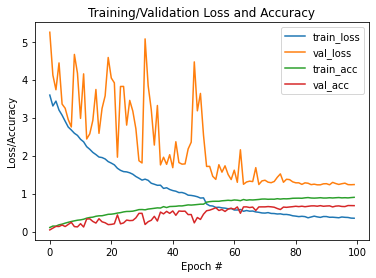

In [55]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(os.path.join(output_dir ,'vggnet_plot.png'))

In [21]:
! pip install loguru

You should consider upgrading via the 'c:\users\mavis\anaconda3\python.exe -m pip install --upgrade pip' command.
